### ROC Curve and AUC Calculation: A Step-by-Step Explanation
In this notebook, we explore how to compute and visualize the **ROC (Receiver Operating Characteristic) curve** and calculate the **AUC (Area Under the Curve)** both manually and using sklearn.
The ROC curve is plotted using given data consisting of actual class labels (y_true) and predicted probabilities (y_scores). In manual implementation we consider a certain number of **thresholds**. For each of them, we calculate the **confusion matrix** witch we use to compute the **False Positive Rate (FPR)** and **True Positive Rate (TPR)**. These values allow us to construct the ROC curve, which visually represents the trade-off between FPR and TPR at different thresholds.
After plotting the ROC curve, we proceed to calculate the AUC manually. The trapezoidal rule is used for this purpose. This rule **approximates** the area under the curve by summing the **areas of trapezoids** formed between consecutive points on the ROC curve. The formula for the AUC using the trapezoidal rule is:

$$
\text{AUC} = \sum_{i=1}^{n-1} \frac{(\text{FPR}_i - \text{FPR}_{i-1}) \cdot (\text{TPR}_i + \text{TPR}_{i-1})}{2}
$$


Here, $ \text{FPR}_i $, $ \text{TPR}_i $ represent the False Positive Rate and True Positive Rate at the i-th threshold, respectively. The trapezoidal rule calculates the area of each trapezoid using the difference in FPR values as the base and the average of TPR values as the height.\
**NOTE**: To apply this method, it is essential to **sort the FPR values in ascending order**.

The visualization of the trapezoidal approximation provides an intuitive understanding of how the AUC is calculated. Each trapezoid is highlighted with a distinct color, making it easier to see how the total area under the curve is built incrementally.


To confirm the accuracy of our manual calculation, we also compute the AUC using **sklearn**. The `roc_curve` function returns the FPR and TPR values, while the `auc` function computes the area under the curve. By comparing the AUC values obtained through the manual approach and the library function, we can validate the correctness of our calculations.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

In [2]:
# Given data: actual class labels and predicted probabilities
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.7, 0.6, 0.9, 0.3, 0.75, 0.2])

# Define the thresholds
thresholds = [0.1, 0.3, 0.4, 0.5, 0.7]

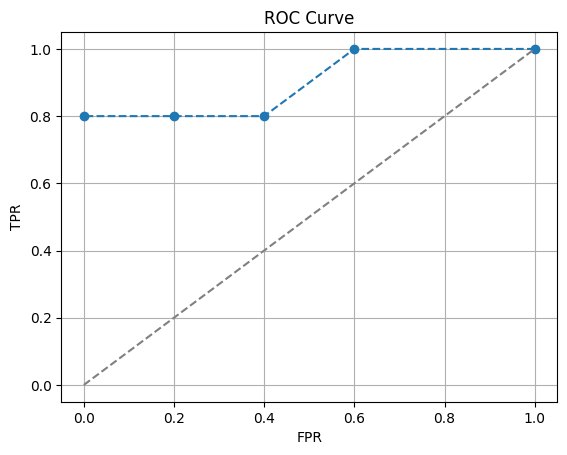

In [3]:
# Initialize lists to store TPR and FPR for each threshold
tpr_list = []
fpr_list = []

# Calculate confusion matrix for each threshold
for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    
    # Calculate True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # Calculate TPR (Recall) and FPR
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    # Append TPR and FPR to the lists
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_list, tpr_list, marker='o', linestyle='--')

# Add labels and title
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

AUC (trapezoidal rule): 0.90


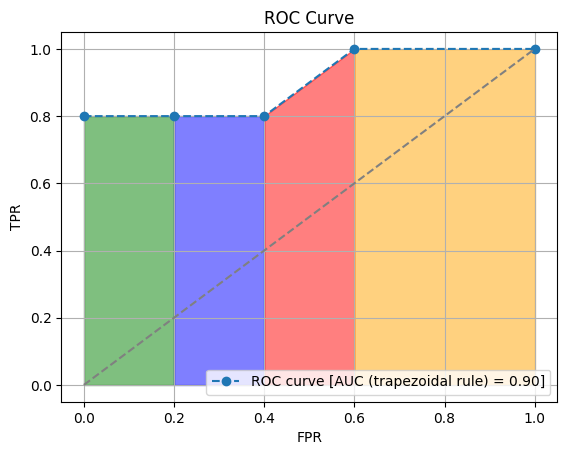

In [4]:
# Sort the points by FPR (important to calculate AUC using the Trapezoidal rule)
sorted_points = sorted(zip(fpr_list, tpr_list))
fpr_sorted, tpr_sorted = zip(*sorted_points)


# Calculate AUC using the trapezoidal rule (after sorting the points)
auc_trap = 0
for i in range(1, len(fpr_sorted)):
    # Calculate the area between two consecutive points (each point is identified by the FPR and TRP values)
    auc_trap += (fpr_sorted[i] - fpr_sorted[i-1]) * (tpr_sorted[i] + tpr_sorted[i-1]) / 2

# Print the AUC value obtained using the trapezoidal rule
print(f"AUC (trapezoidal rule): {auc_trap:.2f}")


# Plot AUC (Trapezoidal rule)
# Define a set of distinct colors for each trapezoid
colors = ['green', 'blue', 'red', 'orange', 'purple', 'yellow', 'brown']

# Plot the ROC curve
plt.figure()
plt.plot(fpr_sorted, tpr_sorted, label=f'ROC curve [AUC (trapezoidal rule) = {auc_trap:.2f}]', marker='o', linestyle='--')

# Highlight trapezoids and color the areas
for i in range(1, len(fpr_sorted)):
    # Use a unique color for each trapezoid area
    color = colors[i-1 % len(colors)]
    plt.fill_between([fpr_sorted[i-1], fpr_sorted[i]], 
                     [tpr_sorted[i-1], tpr_sorted[i]], 
                     color=color, alpha=0.5)

# Add labels and title
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

AUC (sklearn): 0.92


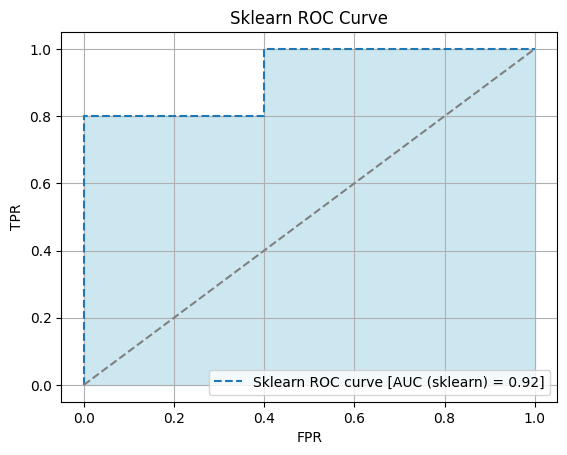

In [5]:
# To verify how good is our approximation let's calculate AUC also by using sklearn's implementation
fpr, tpr, _ = roc_curve(y_true, y_scores)
auc_sklearn = auc(fpr, tpr)

# Print the sklearn AUC value
print(f"AUC (sklearn): {auc_sklearn:.2f}")

# Plot the Sklearn ROC Curve
plt.plot(fpr, tpr, label=f'Sklearn ROC curve [AUC (sklearn) = {auc_sklearn:.2f}]', linestyle='--')

# Color the area under the curve of the sklearn ROC curve
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.6)

# Add labels and title for the sklearn plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Sklearn ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()